In [171]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

# Estimating Perspective Shift

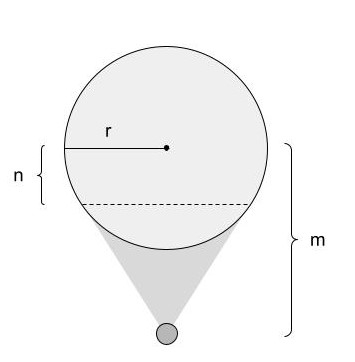

Plane of occlusion offset (relative to center of circular object) as a function of object radius, r, and distance from object center, m:

$$ n = r(1-cos(sin^{-1}(\frac{r}{m}))) $$

In [392]:
def get_n(m, r):
    """calculates plane of occlusion offset as a function of cicrular object radius 
    and distance from object center"""
    n = r*(1-np.cos(np.arcsin(r/m)))
    return n

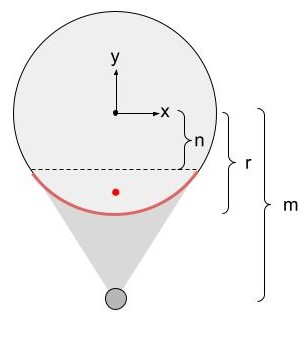

Calculating the "center" (drawn as red dot) of all points lying on the visible surface (red arc):

$$ \mu = [\mu_x, \mu_y ] $$

If reference frame is centered below object:

$$ \mu_{x} = 0 $$

<!-- ## Wrong

Use equation for semicircle to get vertical component: 
$$ y = \sqrt{r^2 - x^2} $$

$$ \mu_{y} = \frac{1}{|x_{y = r} - x_{y = n}|} \int _{x_{y = r}} ^{x_{y = n}} \sqrt{r^2 - x^2} dx $$ 

$$  = \frac{1}{\sqrt{r^2 - n^2}} \int ^{\sqrt{r^2 - n^2}} _{0} \sqrt{r^2 -x^2} dx $$ 

$$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} x \sqrt{r^2 - x^2} + r^2 sin^{-1} \bigg(\frac{x}{r} \bigg) \bigg] \bigg\rvert^{\sqrt{r^2 - n^2}}_{0} $$ 
-->
<!-- $$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} n \sqrt{r^2 - n^2} + tan^{-1} \bigg(\frac{\sqrt{r^2 - n^2}}{\sqrt{2r^2 - n^2}} \bigg) \bigg]  $$ -->

<!-- $$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} n \sqrt{r^2 - n^2} + (r^2 - n^2) sin^{-1} \bigg(\frac{\sqrt{r^2 - n^2}}{r} \bigg) \bigg]  $$ -->


Using mean y coordinate:

$$ \mu_{y} = \frac{1}{\sqrt{r^2-n^2}} \int_0^{\sqrt{r^2-n^2}} \sqrt{r^2 - x^2} dx $$ 


$$  = \frac{1}{\sqrt{r^2 - n^2}} \frac{1}{2} \bigg[  x \sqrt{r^2 - x^2} + r^2 sin^{-1} \bigg(\frac{x}{r} \bigg) \bigg] \bigg\rvert^{\sqrt{r^2 - n^2}}_{0} $$ 


Using the centriod (alternate method):

$$ \mu_y = \frac{ \int _{n} ^{r} 2xy dy}{Segment Area} $$ 


$$ \mu_y = \frac{\int _{n} ^{r} 2y \sqrt{r^2 - y^2} dy}{Segment Area} $$

$$ \mu_y = \frac{ \frac{-2}{3} \bigg{(}r^2 - y^2\bigg{)}^{\frac{3}{2}}  \bigg\rvert^{r}_{n}} { ( \phi r^2 ) - ( nr*sin(\phi) ) }, \phi = \frac{\pi}{2}-sin^{-1} \bigg{(} \frac{n}{r} \bigg{)} $$


In [492]:
def get_mu(m,r):
    """returns offset between circular object center and observed distribution center"""
    n = get_n(m,r)
    phi = (np.pi/2) - np.arcsin(n/r)

#     # Centroid ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     # area = area of pizza slice - area of triangle
#     area = (phi * r**2) - ( n*r*np.sin(phi)) #CORRECT
#     mu_y = ((-2/3)*(r**2 - n**2)**(3/2))/ area 
#     #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    #mean y value ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    x = np.sqrt(r**2 - n**2)
    high = -(1/np.sqrt(r**2 - n**2)) *(0.5*(x*np.sqrt(r**2 - x**2) + (r**2)*np.arcsin(x/r)))
    x = 0
    low = (1/np.sqrt(r**2 - n**2)) *(0.5*(x*np.sqrt(r**2 - x**2) + (r**2)*np.arcsin(x/r)))
    mu_y = high - low
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    mu_x = 0.0
    mu = np.array([[mu_x, mu_y]])
    return mu
    

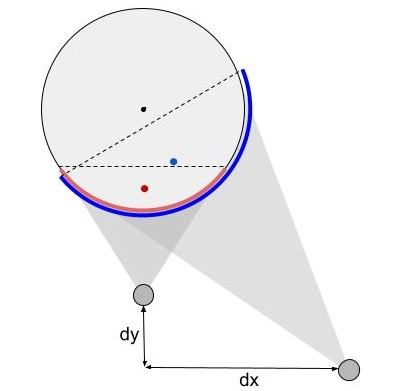

In [588]:
def get_shift(obj_radius, obj_center, dX, ax, draw = False):
    """calculates affect of perspective shift when moving dX relative to feature i"""
    #get distribution center from scan1
    m0 = np.sqrt(obj_center[0]**2 + obj_center[1]**2)    #get distance between obj and X0
    mu0 = get_mu(m0, obj_radius) #+ obj_center
    theta0 = np.arctan2(obj_center[0], obj_center[1])
    rot0 = np.array([[np.cos(theta0), -np.sin(theta0)],
                     [np.sin(theta0), np.cos(theta0)]])
    mu0 = (mu0).dot(rot0) + obj_center
    
    #get distribution center from scan2
    m1 = np.sqrt((obj_center[0] - dX[0])**2 + (obj_center[1] - dX[1])**2 )  #get distance between obj and X1
    mu1 = get_mu(m1, obj_radius) #+ obj_center
    theta1 = np.arctan2(obj_center[0] - dX[0] , obj_center[1] - dX[1])
    #rotation matrix to transform mu1
    rot1 = np.array([[np.cos(theta1), -np.sin(theta1)],
                     [np.sin(theta1), np.cos(theta1)]])
    mu1 = (mu1).dot(rot1) + obj_center    

    if draw:
        ax.plot(mu0[:,0],mu0[:,1], 'ro')
        ax.plot(mu1[:,0],mu1[:,1], 'bo')
#         ax.plot([dX[0], dX[0] + m1*np.sin(theta1)], [dX[1], dX[1] + m1*np.cos(theta1)]) #verify theta

    shift = mu1 - mu0
    return shift

<IPython.core.display.Javascript object>


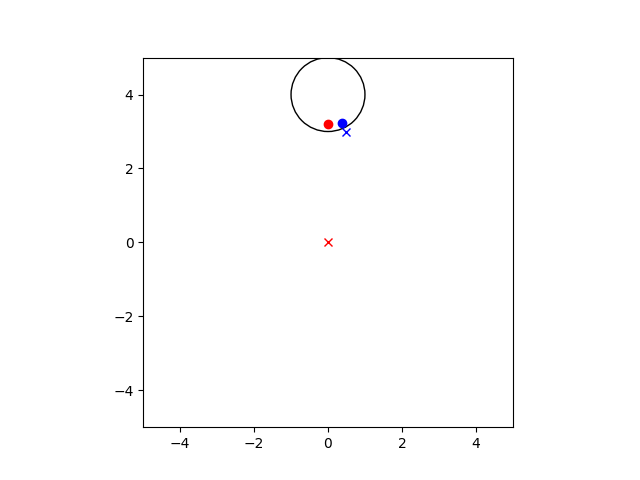

[[0.38793802 0.00990772]]


In [613]:
#calculte perspective shift when moving between two points
fix, ax = plt.subplots()
r = 1
obj = np.array([-0.0,4])
dX = np.array([0.5,  3])

shift = get_shift(r, obj, dX, ax, draw = True)
print(shift)

X0 = np.array([0,0]) #set to origin
X1 = X0 + dX
ax.set_aspect('equal')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
circle = plt.Circle(obj,r, fill = False)
ax.add_patch(circle)
ax.plot(X0[0],X0[1], 'rx')
ax.plot(X1[0],X1[1], 'bx')

Plane of occlusion offset: 0.2546440075000701
Distribution center: [[ 0.         -0.80636514]]


<IPython.core.display.Javascript object>


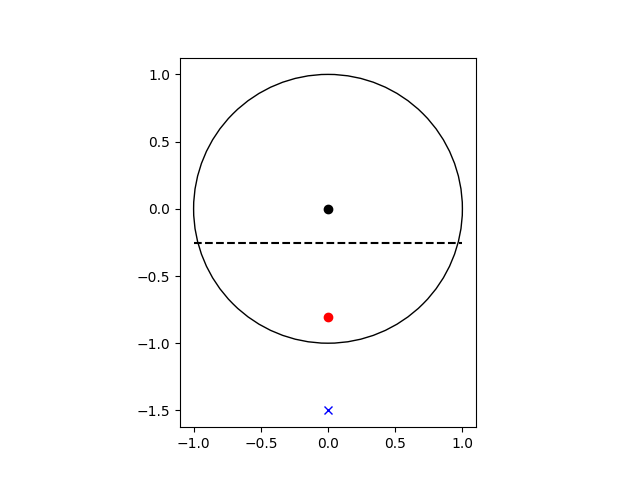

In [614]:
#Calculate apparent center of single visible surface and draw 
r = 1 #object radius
m = 1.5 #distance from object center

n = get_n(m,r) #plane of occlusion offset
print("Plane of occlusion offset:", n)
mu = get_mu(m,r)
print("Distribution center:", mu)

fig, ax = plt.subplots()
ax.set_aspect('equal')
# ax.set_xlim([-5,5])
# ax.set_ylim([-5,5])
circle = plt.Circle((0,0),r, fill = False)
ax.add_patch(circle)

ax.plot(0, -m, 'bx') #draw observer
ax.plot(0,0,'ko') #draw center of circular object
ax.plot([-r,r], [-n, -n], 'k--') #draw occlusion plane
ax.plot(mu[0,0], mu[0,1], 'ro') #draw apparent center of surface

[-0.01793072 -0.76460001]
[ 0.05904337 -0.64139233]


<IPython.core.display.Javascript object>


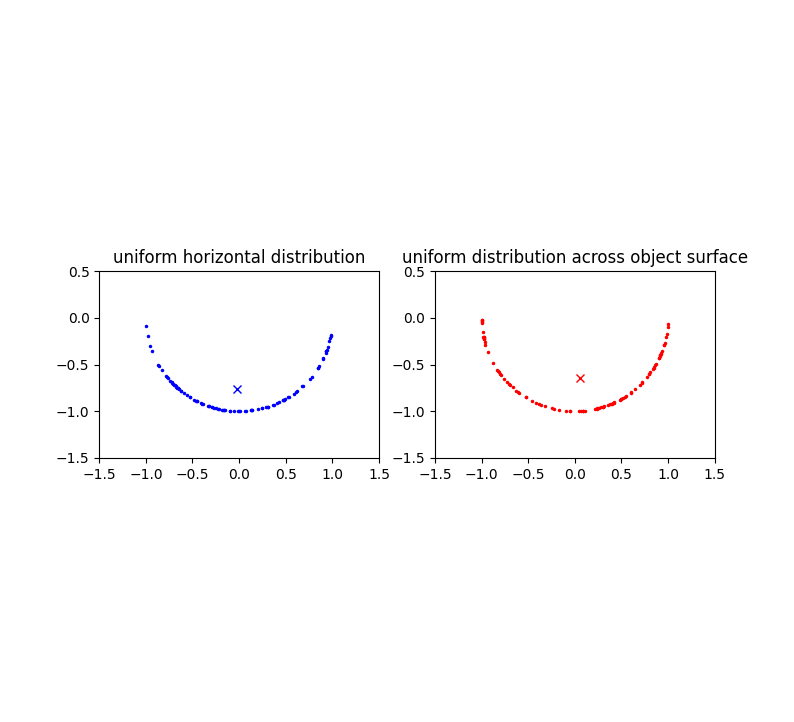

In [615]:
#verify numerically that get_mu is working correctly
rad = 1
npts = 100

# #Uniform spread of NORMALS from OBSERVER POV  ~~~~~~~~~~~~~~~~~~~~~
x = 2*rad*np.random.rand(npts) - rad
y = -np.sqrt(rad**2 - x**2)
pts1 = np.array([x, y]).T
# pts1 = pts1[pts1[:,1] < -.5834] #move occlusion plane
mu1 = np.mean(pts1, axis = 0)
print(mu1)
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#Uniform spread about SURFACE OF ARC ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
roll = np.pi*np.random.rand(npts) + np.pi/2
pts2 = np.array([rad*np.sin(roll), rad*np.cos(roll)]).T
# pts2 = pts2[pts2[:,1] < -.5834] #move occlusion plane
mu2 = np.mean(pts2, axis = 0)
print(mu2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

fig, ax = plt.subplots(1,2)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].set_xlim([-1.5,1.5])
ax[1].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,0.5])
ax[1].set_ylim([-1.5,0.5])

ax[0].set_title("uniform horizontal distribution")
ax[1].set_title("uniform distribution across object surface")
ax[0].plot(pts1[:,0],pts1[:,1], 'b.', ms = 3)
ax[1].plot(pts2[:,0] ,pts2[:,1], 'r.', ms = 3)

ax[0].plot(mu1[0],mu1[1], 'bx')
ax[1].plot(mu2[0],mu2[1], 'rx')

# Questions

#### Even sampling in x direction vs even sampling across surface of object 
This is similar to how a lidar unit records (at sufficient distance)

#### How do determine radius of each object

Can onl use distribution lengths of entire object is contained within a single voxel

Use 3rd moment?

#### Using centroid
Does not line up with MC results, however, logically we know that the measured surfaces are actually representative of physical objects that are most likely NOT convex